<a href="https://colab.research.google.com/github/venkatasaikrishnadussa/azure-ai-explorer/blob/main/AI_102_Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language Detection using Azure AI services

This guide focuses on language detection using Azure AI services. It guides the user through leveraging Azure's capabilities for this purpose.

First, it details creating an Azure AI Multiservice Account, a prerequisite for using these services. This involves navigating to the Azure portal and searching for the specific service to initiate the account creation process.

The core functionality revolves around utilizing Azure AI's language detection features. The guide proceeds to demonstrate how to access and employ these features. This involves using an API or SDK provided by Azure to send text data and receive language identifications in return.

## Azure AI Services multi-service Account Creation

Open https://portal.azure.com in the browser. Then login into the portal with your credentials.

Then search "Azure AI Multiservice Account" in the portal

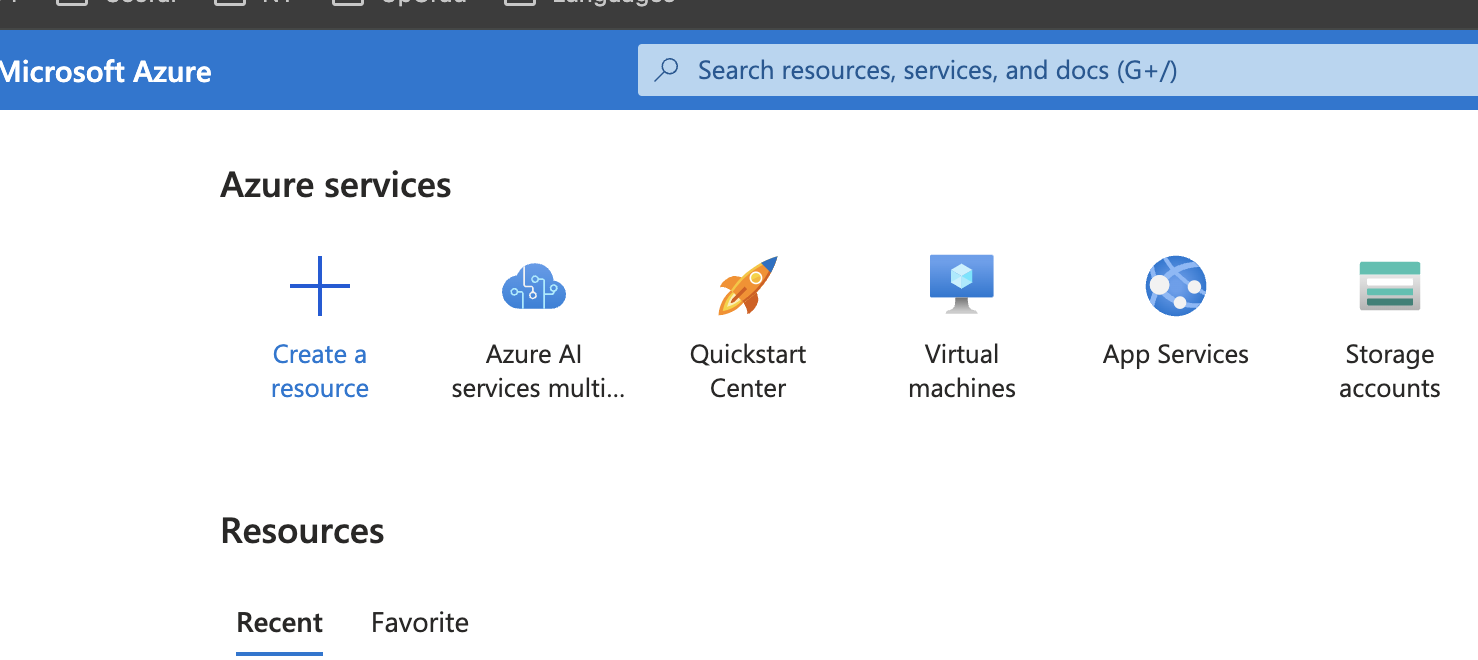

Please create "Azure AI services multi-service account" with the required information like name, resource group etc. Afrer creating "Azure AI serices multi-service account" resource. Go to that particular resource and navigate to "Resource Management" > "Keys and Endpoint" to fetch Keys and Endpoints.

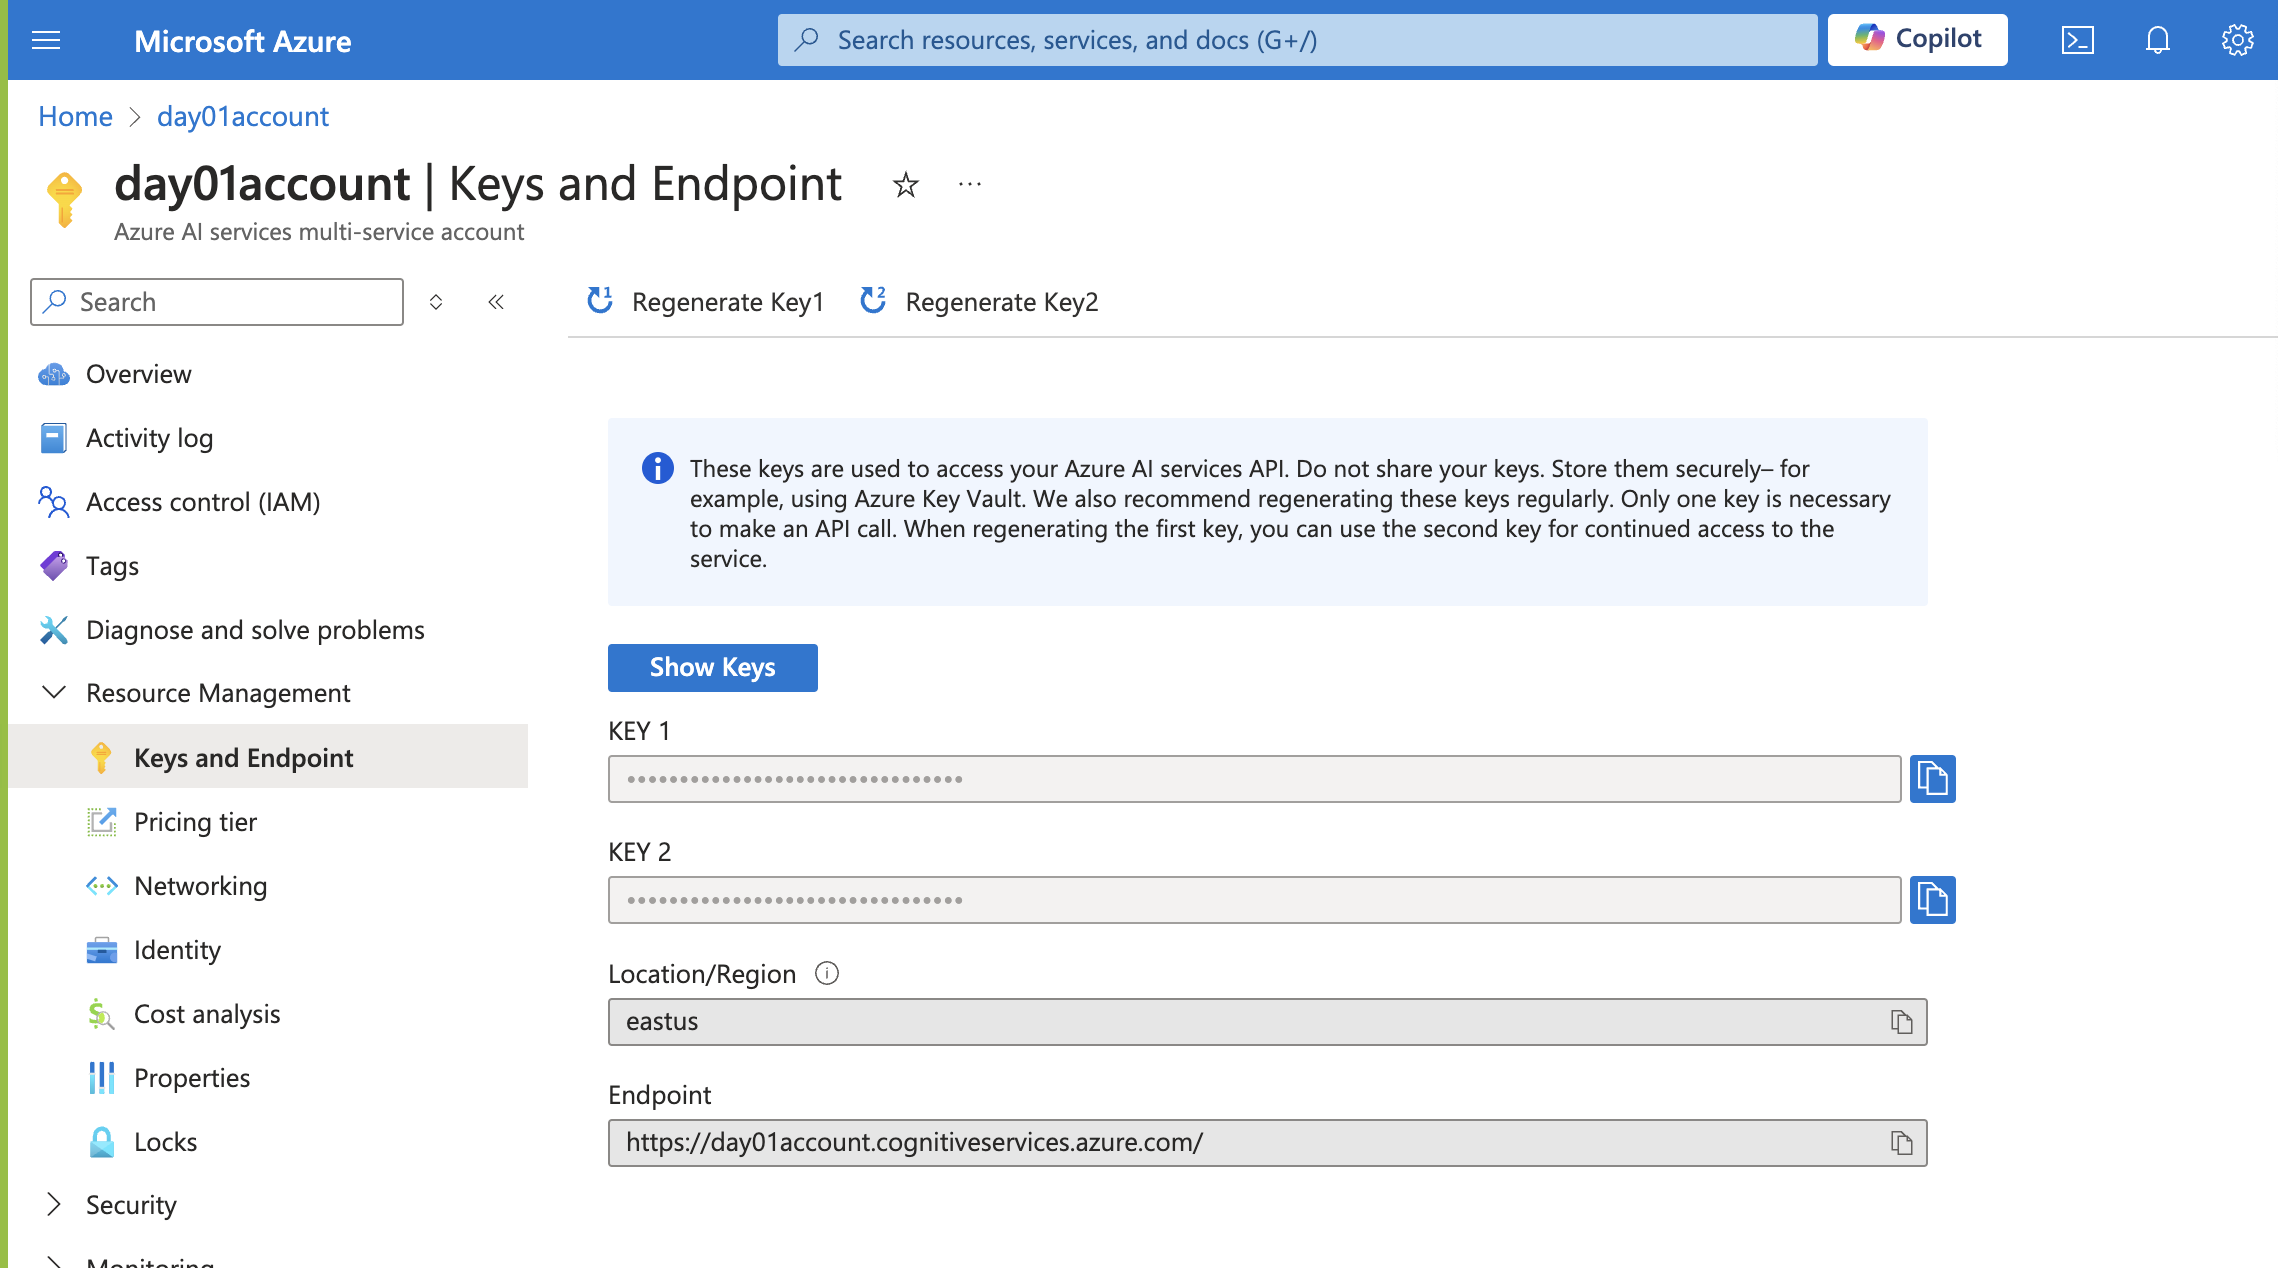

## REST Client Approach to Detect Lanugage

Import necessary libraries

In [1]:
import requests
import json

This section defines the body of the request to the Azure AI Language API.


In [2]:
# Define the request body
body = {
    "documents":[
        {
            "id": 1,
            "text": "bonjour"
        }
    ]
}

# Convert the body to JSON format
json_body = json.dumps(body, indent=2)
print(json_body)

{
  "documents": [
    {
      "id": 1,
      "text": "bonjour"
    }
  ]
}


 This section retrieves the Azure subscription key from colab user data and defines the API endpoint.


In [3]:
# Get the Azure subscription key from user data
from google.colab import userdata
subscription_key = userdata.get('AZURE_SUBSCRIPTION_KEY')

# Define the API endpoint
API_ENDPOINT = "https://day01account.cognitiveservices.azure.com"

# Define the headers for the request
headers = {"Content-Type": "application/json", "Ocp-Apim-Subscription-Key": subscription_key}

Send the request to the API

In [4]:
response = requests.post(url = f"{API_ENDPOINT}/text/analytics/v3.1/languages?", data=json_body, headers=headers)
response.json()

{'documents': [{'id': '1',
   'detectedLanguage': {'name': 'French',
    'iso6391Name': 'fr',
    'confidenceScore': 1.0},
   'warnings': []}],
 'errors': [],
 'modelVersion': '2024-04-01'}

This section extracts the detected language from the API response.

In [5]:
response.json()["documents"][0]["detectedLanguage"]["name"]

'French'

Define a function to get the language of a text

In [6]:
def get_language(text: str) -> str:
    body = {
        "documents":[
            {
                "id": 1,
                "text": text
            }
        ]
    }
    headers = {"Content-Type": "application/json", "Ocp-Apim-Subscription-Key": subscription_key}
    response = requests.post(url = f"{API_ENDPOINT}/text/analytics/v3.1/languages?", data=json.dumps(body), headers=headers)
    return response.json()["documents"][0]["detectedLanguage"]["name"]


This section tests the get_language function with different texts.

In [7]:
get_language("hello")

'English'

In [8]:
get_language("bonjour")

'French'

In [9]:
get_language("hola")

'Spanish'

In [10]:
get_language("hallo")

'German'

## SDK Approach to Detect Language

This section installs the azure-ai-textanalytics library.

In [11]:
!pip install azure-ai-textanalytics==5.3.0

This section imports necessary classes from the Azure AI Text Analytics library.

In [12]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

This section creates a TextAnalyticsClient object using the Azure subscription key and API endpoint.

In [13]:
credential = AzureKeyCredential(key=subscription_key)
client = TextAnalyticsClient(endpoint=API_ENDPOINT, credential=credential)

This section uses the TextAnalyticsClient to detect the language of a text.

In [14]:
client.detect_language(documents=["bonjour"])[0].primary_language.name

'French'

Define a function to get the language of a text

In [15]:
def detect_language(text: str) -> str:
    return client.detect_language(documents=[text])[0].primary_language.name

This section uses the TextAnalyticsClient to detect the language of a text.

In [16]:
detect_language("hello")

'English'

In [17]:
detect_language("bonjour")

'French'

In [18]:
detect_language("hola")

'Spanish'

In [19]:
detect_language("hallo")

'German'